<a href="https://colab.research.google.com/github/MunebAli132/Traffic-Prediction-with-Machine-Learning/blob/main/Research_Work_Traffic_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import keras
from keras.models import Sequential
from keras.layers import Dense,RepeatVector
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.metrics import mean_absolute_percentage_error
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional,RNN
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Bidirectional, RepeatVector, TimeDistributed, Flatten,LSTM
from keras.layers import RNN, SimpleRNN

from statsmodels.tsa.arima.model import ARIMA

import seaborn as sns


In [ ]:
T1= pd.read_csv('//content/drive/MyDrive/Research Work- Traffic Prediction/HourlyVol_1.csv',parse_dates=[['date', 'hour']])

In [ ]:
T1['TotalVol']=T1['Total Vol'].replace(-1,np.nan)
T1= T1.ffill()
T1=T1.bfill()

In [ ]:
T1['date_hour'] = pd.to_datetime(T1['date_hour'], format='%m/%d/%Y  %H')

In [ ]:
T1_vol=T1['Total Vol'].values
Time=T1['date_hour'].values

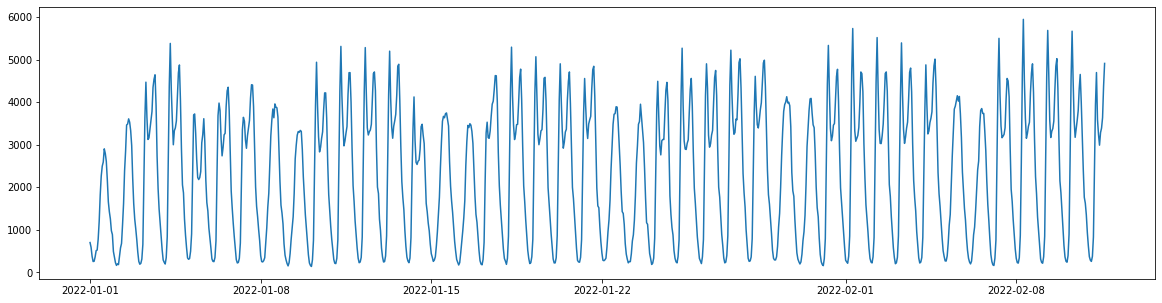

In [ ]:
plt.figure(figsize=(20, 5))
plt.plot(Time[0:1000] ,T1_vol[0:1000])
#plt.plot(Time,T1_vol)


In [ ]:
timestep = 5

X= []
Y=[]

raw_data=T1_vol

for i in range(len(raw_data)- (timestep)):
    X.append(raw_data[i:i+timestep])
    Y.append(raw_data[i+timestep])
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [ ]:
split_ratio = int(len(Time)*0.70)
time_train = Time[:split_ratio]
time_valid = Time[split_ratio:]

x_train = X[:split_ratio]
x_valid = X[split_ratio:]

y_train= Y[:split_ratio]
y_valid =Y[split_ratio:]


CNN model 

In [ ]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(5, 1)))
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(1))
model_cnn.compile(optimizer='adam', loss='mse')

In [ ]:

from keras.callbacks import ModelCheckpoint, EarlyStopping
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',restore_best_weights=True,
patience =30,mode='min')


In [ ]:
history_Cnn = model_cnn.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs = 200,
 shuffle = False,
callbacks = [early_stop])



Epoch 1/200
48/48 [==============================] - 1s 8ms/step - loss: 1713098.8750 - val_loss: 691096.3125
Epoch 2/200
48/48 [==============================] - 0s 6ms/step - loss: 386717.2812 - val_loss: 263320.7812
Epoch 3/200
48/48 [==============================] - 0s 6ms/step - loss: 181010.1875 - val_loss: 167994.0469
Epoch 4/200
48/48 [==============================] - 0s 6ms/step - loss: 140942.6719 - val_loss: 143903.3594
Epoch 5/200
48/48 [==============================] - 0s 6ms/step - loss: 130162.6641 - val_loss: 141246.0625
Epoch 6/200
48/48 [==============================] - 0s 6ms/step - loss: 125820.1484 - val_loss: 132758.3594
Epoch 7/200
48/48 [==============================] - 0s 6ms/step - loss: 119397.7422 - val_loss: 121739.5859
Epoch 8/200
48/48 [==============================] - 0s 6ms/step - loss: 114397.7422 - val_loss: 119394.0938
Epoch 9/200
48/48 [==============================] - 0s 5ms/step - loss: 111325.6797 - val_loss: 116018.3281
Epoch 10/200
48/48

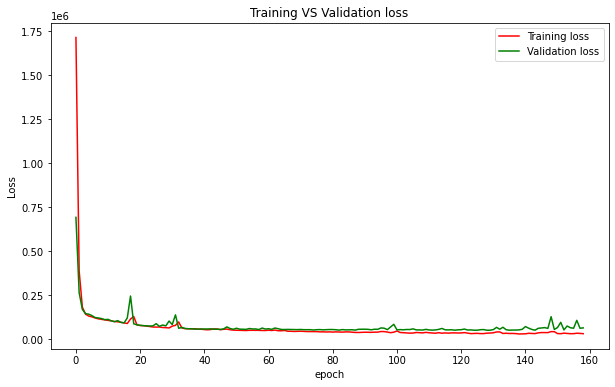

In [ ]:

plt.figure(figsize = (10, 6))
plt.plot(history_Cnn.history['loss'],'r', label='Training loss')
plt.plot(history_Cnn.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

21/21 [==============================] - 0s 2ms/step


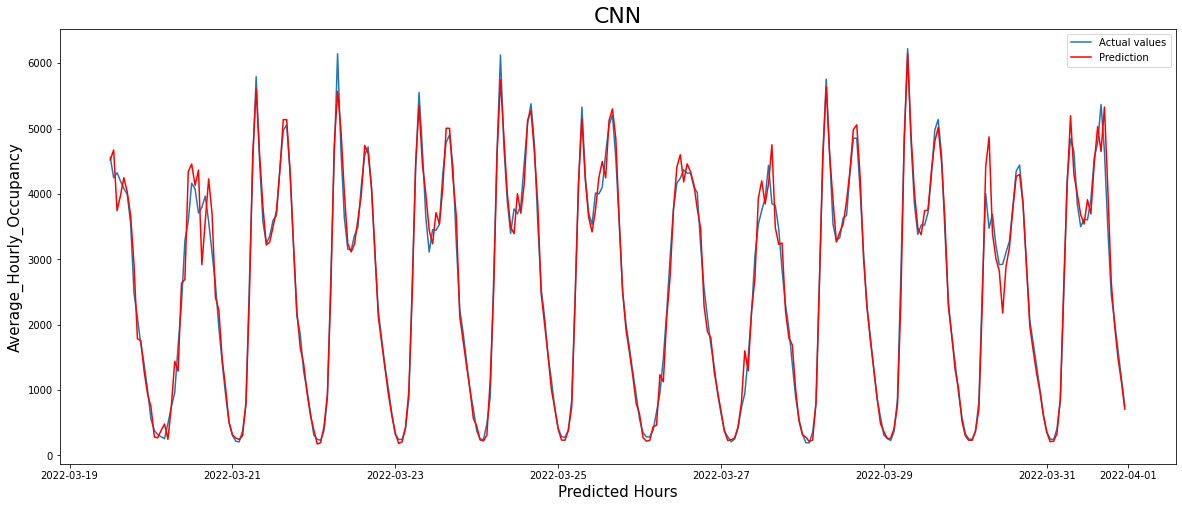

In [ ]:
predic_cnn = model_cnn.predict(x_valid)
pyplot.figure(figsize=(20,8))
pyplot.plot(Time[len(Time)-300 :],y_valid[len(y_valid)-300 :],label ='Actual values')
pyplot.plot(Time[len(Time)-300 :],predic_cnn[len(predic_cnn)-300:], 'r',label ='Prediction')
pyplot.legend(fontsize = 10)
plt.xlabel('Predicted Hours', fontsize = 15)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 15)
plt.title('CNN', fontsize = 22)
pyplot.show()

In [ ]:
mean_absolute_percentage_error(predic_cnn,y_valid)

0.09445448719254683

LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(5,1)))
model_lstm.add(Dense(1))  
model_lstm.compile(loss='mse', optimizer='adam')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', restore_best_weights=True,
patience =30,mode='min')  

In [ ]:
history_lstm = model_lstm.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs = 200,
 shuffle = False,
callbacks = [early_stop])


Epoch 1/200
48/48 [==============================] - 1s 8ms/step - loss: 8624890.0000 - val_loss: 7008913.5000
Epoch 2/200
48/48 [==============================] - 0s 6ms/step - loss: 3938249.2500 - val_loss: 2577898.0000
Epoch 3/200
48/48 [==============================] - 0s 6ms/step - loss: 1916072.7500 - val_loss: 1765051.5000
Epoch 4/200
48/48 [==============================] - 0s 5ms/step - loss: 1437592.5000 - val_loss: 1566472.6250
Epoch 5/200
48/48 [==============================] - 0s 5ms/step - loss: 1341592.0000 - val_loss: 1555709.8750
Epoch 6/200
48/48 [==============================] - 0s 6ms/step - loss: 1184179.3750 - val_loss: 1072370.3750
Epoch 7/200
48/48 [==============================] - 0s 6ms/step - loss: 933587.0625 - val_loss: 876173.3125
Epoch 8/200
48/48 [==============================] - 0s 5ms/step - loss: 791997.6250 - val_loss: 845609.1875
Epoch 9/200
48/48 [==============================] - 0s 5ms/step - loss: 754162.4375 - val_loss: 804594.5000
Epoch 1

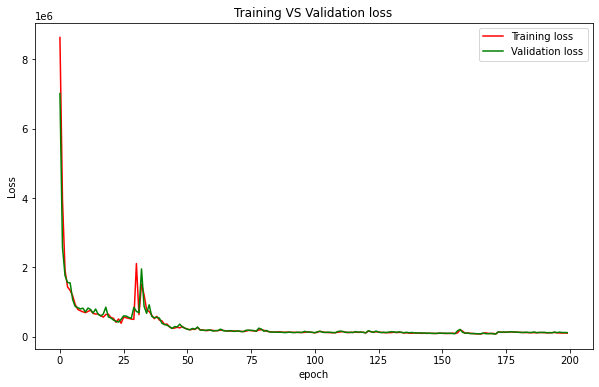

In [ ]:

plt.figure(figsize = (10, 6))
plt.plot(history_lstm.history['loss'],'r', label='Training loss')
plt.plot(history_lstm.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

21/21 [==============================] - 0s 1ms/step


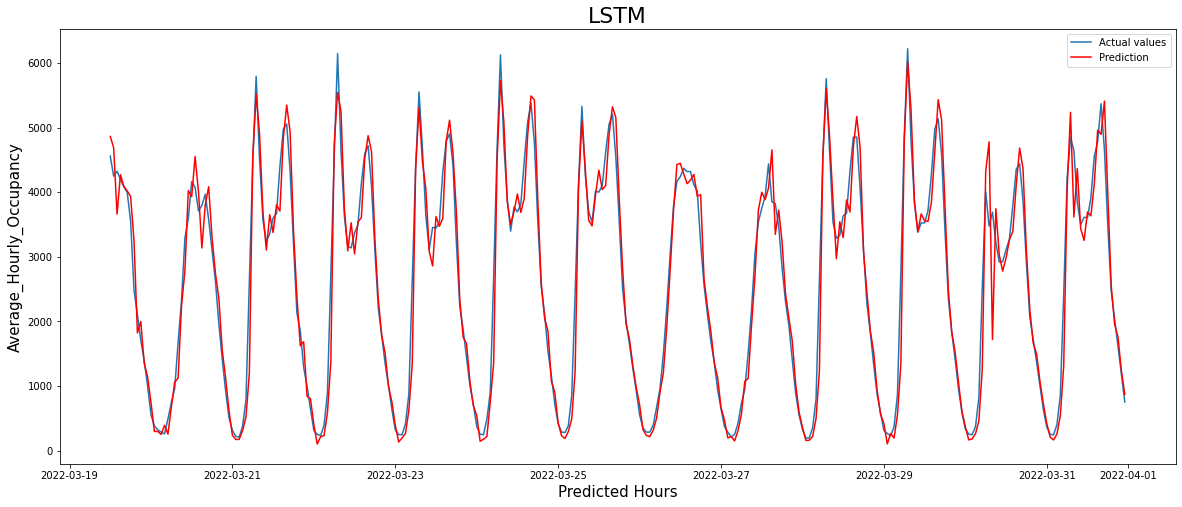

In [ ]:
predic_lstm = model_lstm.predict(x_valid)
pyplot.figure(figsize=(20,8))
pyplot.plot(Time[len(Time)-300 :],y_valid[len(y_valid)-300 :],label ='Actual values')
pyplot.plot(Time[len(Time)-300 :],predic_lstm[len(predic_lstm)-300:], 'r',label ='Prediction')
pyplot.legend(fontsize = 10)
plt.xlabel('Predicted Hours', fontsize = 15)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 15)
plt.title('LSTM', fontsize = 22)
pyplot.show()

In [ ]:
mean_absolute_percentage_error(predic_lstm,y_valid)

0.17964386616993744

GRU

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(50, activation='relu', input_shape=(5,1)))
model_gru.add(Dense(1))  
model_gru.compile(loss='mse', optimizer='adam')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', restore_best_weights=True,
patience =30,mode='min')  

In [ ]:
history_gru = model_gru.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs = 200,
 shuffle = False,
callbacks = [early_stop])

Epoch 1/200
48/48 [==============================] - 2s 9ms/step - loss: 6586715.5000 - val_loss: 4839861.5000
Epoch 2/200
48/48 [==============================] - 0s 5ms/step - loss: 2056603.8750 - val_loss: 1094135.5000
Epoch 3/200
48/48 [==============================] - 0s 5ms/step - loss: 882417.2500 - val_loss: 944116.2500
Epoch 4/200
48/48 [==============================] - 0s 5ms/step - loss: 852068.8125 - val_loss: 880195.5625
Epoch 5/200
48/48 [==============================] - 0s 5ms/step - loss: 741496.7500 - val_loss: 756432.3125
Epoch 6/200
48/48 [==============================] - 0s 5ms/step - loss: 627539.1875 - val_loss: 693330.5625
Epoch 7/200
48/48 [==============================] - 0s 5ms/step - loss: 640202.3125 - val_loss: 674666.1250
Epoch 8/200
48/48 [==============================] - 0s 5ms/step - loss: 597081.3750 - val_loss: 673862.6875
Epoch 9/200
48/48 [==============================] - 0s 5ms/step - loss: 665709.7500 - val_loss: 751552.3125
Epoch 10/200
48

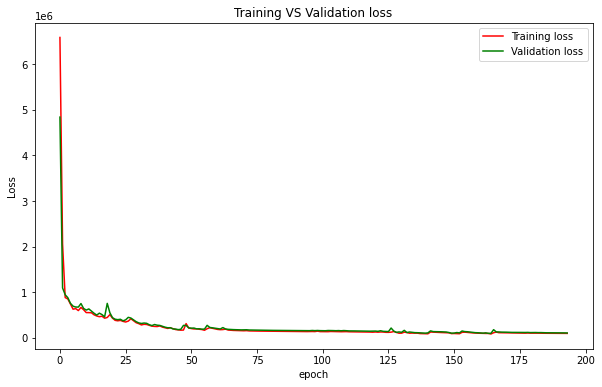

In [ ]:

plt.figure(figsize = (10, 6))
plt.plot(history_gru.history['loss'],'r', label='Training loss')
plt.plot(history_gru.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

21/21 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'GRU')

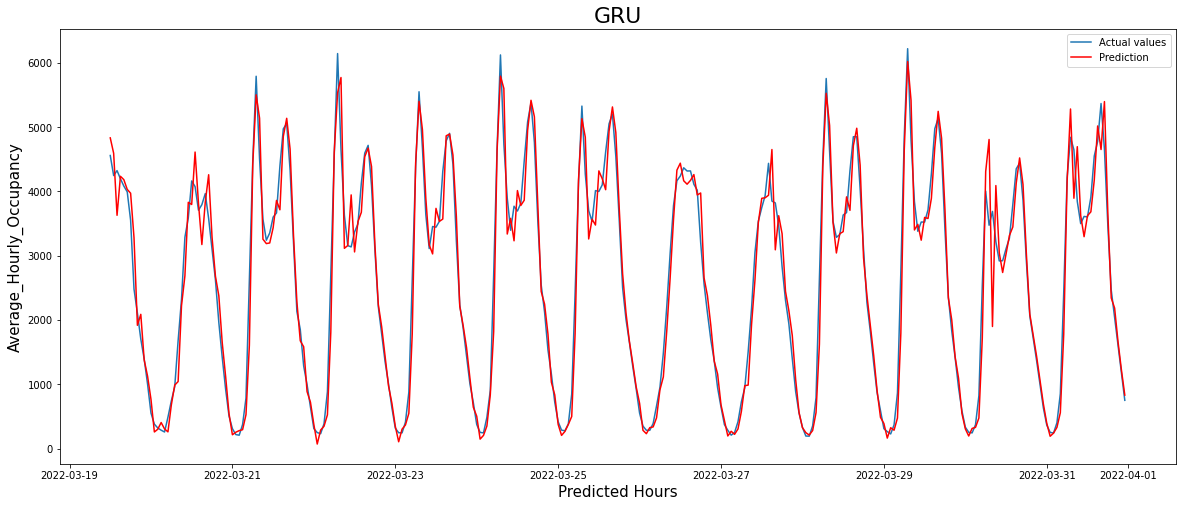

In [ ]:
predic_gru = model_gru.predict(x_valid)
pyplot.figure(figsize=(20,8))
pyplot.plot(Time[len(Time)-300 :],y_valid[len(y_valid)-300 :],label ='Actual values')
pyplot.plot(Time[len(Time)-300 :],predic_gru[len(predic_gru)-300:], 'r',label ='Prediction')
pyplot.legend(fontsize = 10)
plt.xlabel('Predicted Hours', fontsize = 15)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 15)
plt.title('GRU', fontsize = 22)

In [ ]:
mean_absolute_percentage_error(predic_gru,y_valid)

0.1491180827176154

BI-LSTM

In [ ]:

model_bilstm = Sequential()
model_bilstm.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(5, 1)))
model_bilstm.add(Bidirectional(LSTM(50)))
model_bilstm.add(Dense(1))
model_bilstm.compile(loss='mse', optimizer='adam')

In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', restore_best_weights=True,
patience =20,mode='min')  

In [ ]:
history_bilstm = model_bilstm.fit(x_train,y_train,validation_data=(x_valid, y_valid),epochs =3000,
callbacks = [early_stop])

Epoch 1/3000
48/48 [==============================] - 7s 38ms/step - loss: 8041061.0000 - val_loss: 9083668.0000
Epoch 2/3000
48/48 [==============================] - 1s 11ms/step - loss: 7986879.0000 - val_loss: 9044154.0000
Epoch 3/3000
48/48 [==============================] - 1s 13ms/step - loss: 7956753.0000 - val_loss: 9014931.0000
Epoch 4/3000
48/48 [==============================] - 1s 12ms/step - loss: 7930698.0000 - val_loss: 8988045.0000
Epoch 5/3000
48/48 [==============================] - 1s 12ms/step - loss: 7906154.5000 - val_loss: 8961895.0000
Epoch 6/3000
48/48 [==============================] - 1s 12ms/step - loss: 7882026.5000 - val_loss: 8936356.0000
Epoch 7/3000
48/48 [==============================] - 1s 12ms/step - loss: 7858475.5000 - val_loss: 8911232.0000
Epoch 8/3000
48/48 [==============================] - 1s 12ms/step - loss: 7835239.5000 - val_loss: 8886243.0000
Epoch 9/3000
48/48 [==============================] - 1s 12ms/step - loss: 7812046.5000 - val_lo

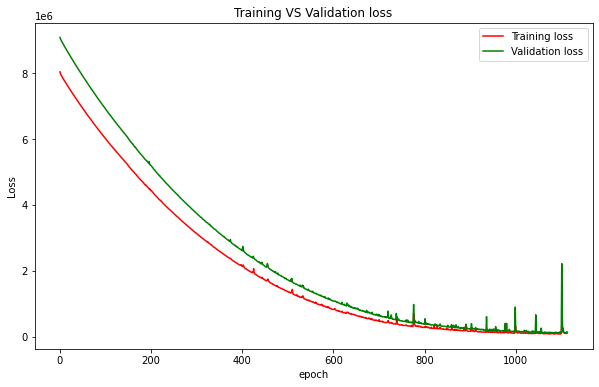

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(history_bilstm.history['loss'],'r', label='Training loss')
plt.plot(history_bilstm.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

21/21 [==============================] - 1s 4ms/step


Text(0.5, 1.0, 'BI-LSTM')

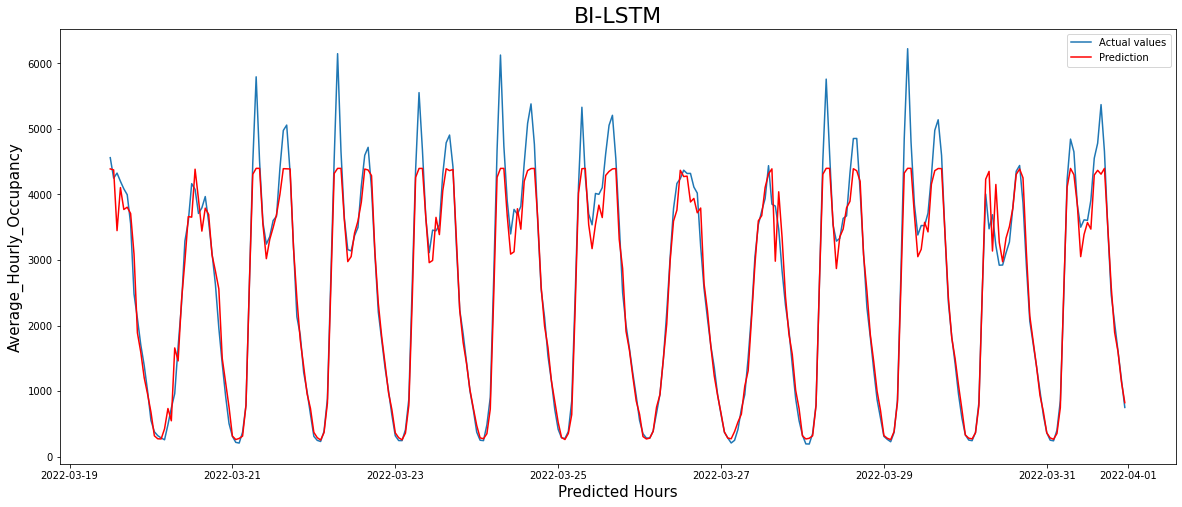

In [ ]:
predic_bilstm= model_bilstm.predict(x_valid)
pyplot.figure(figsize=(20,8))
pyplot.plot(Time[len(Time)-300 :],y_valid[len(y_valid)-300 :],label ='Actual values')
pyplot.plot(Time[len(Time)-300 :],predic_bilstm[len(predic_bilstm)-300:], 'r',label ='Prediction')
pyplot.legend(fontsize = 10)
plt.xlabel('Predicted Hours', fontsize = 15)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 15)
plt.title('BI-LSTM', fontsize = 22)

In [ ]:
mean_absolute_percentage_error(predic_bilstm,y_valid)

0.09532611884784842

RNN

In [ ]:
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(5,1)))
model_rnn.add(Dense(1))  
model_rnn.compile(loss='mse', optimizer='adam')


In [ ]:
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', restore_best_weights=True,
patience =30,mode='min')  


In [ ]:
history_rnn = model_rnn.fit(x_train, y_train,validation_data=(x_valid, y_valid), epochs = 200,
 shuffle = False,
callbacks = [early_stop])

Epoch 1/200
48/48 [==============================] - 1s 7ms/step - loss: 3230666.7500 - val_loss: 1469765.3750
Epoch 2/200
48/48 [==============================] - 0s 3ms/step - loss: 998391.1875 - val_loss: 861755.3125
Epoch 3/200
48/48 [==============================] - 0s 4ms/step - loss: 661080.8750 - val_loss: 618032.5000
Epoch 4/200
48/48 [==============================] - 0s 4ms/step - loss: 498859.3125 - val_loss: 488565.0938
Epoch 5/200
48/48 [==============================] - 0s 4ms/step - loss: 409207.7188 - val_loss: 413140.2500
Epoch 6/200
48/48 [==============================] - 0s 3ms/step - loss: 347980.7812 - val_loss: 351886.7188
Epoch 7/200
48/48 [==============================] - 0s 3ms/step - loss: 297729.7500 - val_loss: 303123.2500
Epoch 8/200
48/48 [==============================] - 0s 4ms/step - loss: 256730.5000 - val_loss: 265125.4062
Epoch 9/200
48/48 [==============================] - 0s 4ms/step - loss: 223615.9844 - val_loss: 233269.7500
Epoch 10/200
48/4

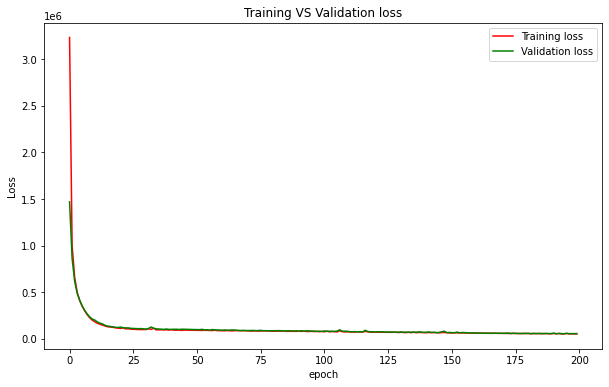

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(history_rnn.history['loss'],'r', label='Training loss')
plt.plot(history_rnn.history['val_loss'],'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

21/21 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'RNN')

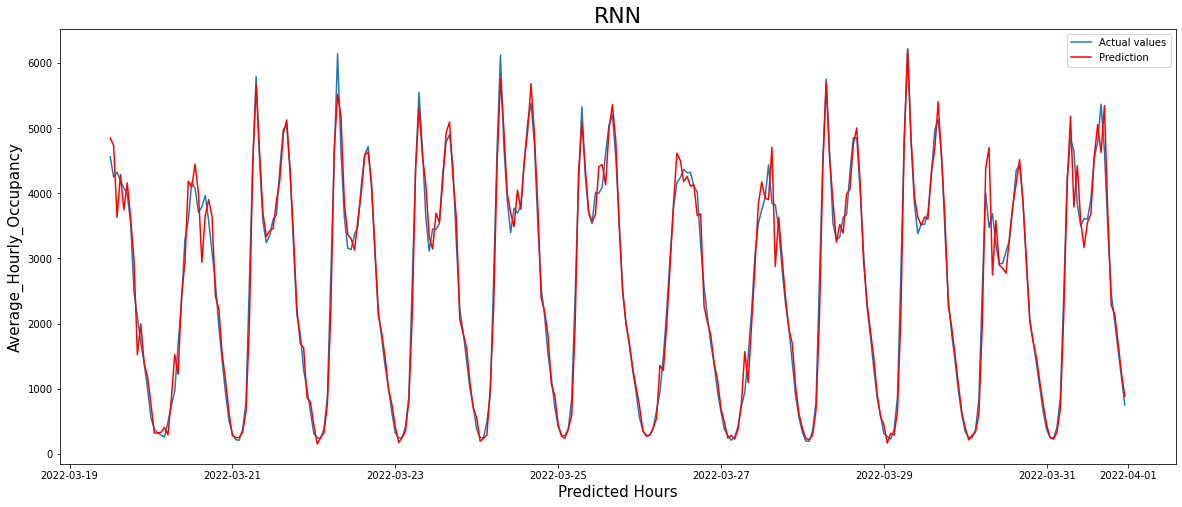

In [ ]:
predic_rnn = model_rnn.predict(x_valid)
pyplot.figure(figsize=(20,8))
pyplot.plot(Time[len(Time)-300 :],y_valid[len(y_valid)-300 :],label ='Actual values')
pyplot.plot(Time[len(Time)-300 :],predic_rnn[len(predic_rnn)-300:], 'r',label ='Prediction')
pyplot.legend(fontsize = 10)
plt.xlabel('Predicted Hours', fontsize = 15)
plt.ylabel('Average_Hourly_Occupancy', fontsize = 15)
plt.title('RNN', fontsize = 22)

In [ ]:
mean_absolute_percentage_error(predic_rnn,y_valid)

0.10754660023893257

**Neural_models**

ARIMA


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(T1_vol)

In [ ]:
model_arima=ARIMA(T1_vol, order=(2,1,4))
predic_rnn=arima_model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


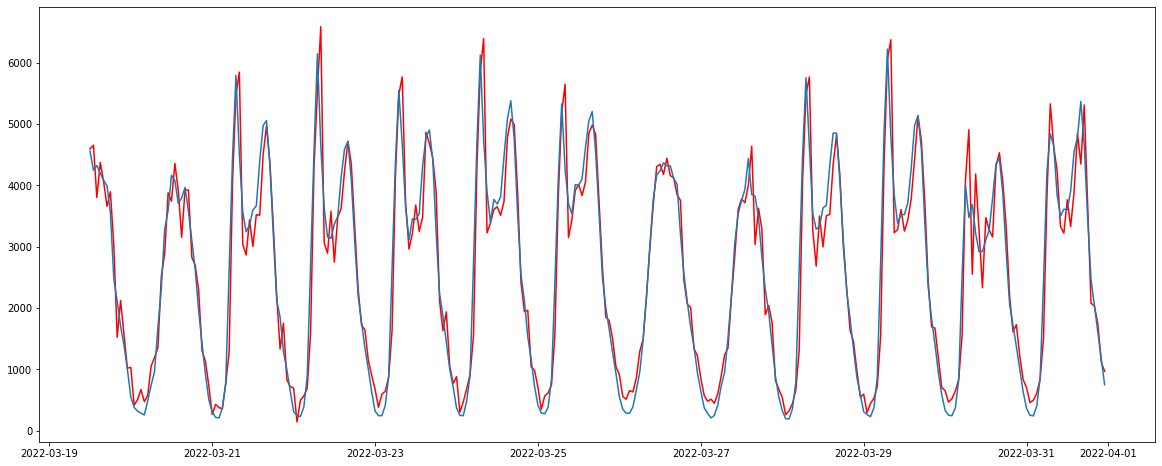

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(Time[len(Time)-300 :],predic_rnn.predict()[len(Time)-300 :], color='red')
plt.plot(Time[len(Time)-300 :],T1_vol[len(Time)-300 :])
plt.show()

In [ ]:

mean_absolute_percentage_error(predic_rnn.predict()[len(T1_vol)-len(y_valid):],y_valid)


0.18639951785586234